In [22]:
from nsepython import datetime, equity_history

end_date = datetime.datetime.now().strftime("%d-%m-%Y")
end_date = str(end_date)

start_date = (datetime.datetime.now()- datetime.timedelta(days=1000)).strftime("%d-%m-%Y")
start_date = str(start_date)

symbol = "SBIN"
series = "EQ"

df = equity_history(symbol,series,start_date,end_date)

In [23]:
df.head(3)

,_id,CH_SYMBOL,CH_SERIES,CH_MARKET_TYPE,CH_TRADE_HIGH_PRICE,CH_TRADE_LOW_PRICE,CH_OPENING_PRICE,CH_CLOSING_PRICE,CH_LAST_TRADED_PRICE,CH_PREVIOUS_CLS_PRICE,...,CH_ISIN,CH_TIMESTAMP,TIMESTAMP,createdAt,updatedAt,__v,SLBMH_TOT_VAL,VWAP,mTIMESTAMP,CA
0,65520ffe03e0ab3f548ef7ab,SBIN,EQ,N,582.5,575.2,581.00,581.35,581.3,581.30,...,INE062A01020,2023-11-13,2023-11-12T18:30:00.000Z,2023-11-13T12:01:02.591Z,2023-11-13T12:01:02.591Z,0,None,578.71,13-Nov-2023,NaN
1,6554b2deebf43376cfba2dbf,SBIN,EQ,N,588.0,582.6,587.25,584.70,584.0,581.35,...,INE062A01020,2023-11-15,2023-11-14T18:30:00.000Z,2023-11-15T12:00:30.269Z,2023-11-15T12:00:30.269Z,0,None,584.93,15-Nov-2023,NaN
2,6556047ffe9d8625499d372e,SBIN,EQ,N,588.0,582.9,584.70,584.65,584.1,584.70,...,INE062A01020,2023-11-16,2023-11-15T18:30:00.000Z,2023-11-16T12:01:03.428Z,2023-11-16T12:01:03.428Z,0,None,585.40,16-Nov-2023,NaN


In [24]:
from plotly import graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df['CH_TIMESTAMP'],
                open=df['CH_OPENING_PRICE'],
                high=df['CH_TRADE_HIGH_PRICE'],
                low=df['CH_TRADE_LOW_PRICE'],
                close=df['CH_CLOSING_PRICE'])])

fig.show()

In [27]:
from ti_tools.simple_moving_average import simple_moving_average as sma

ss = sma(df['CH_CLOSING_PRICE'], 100)

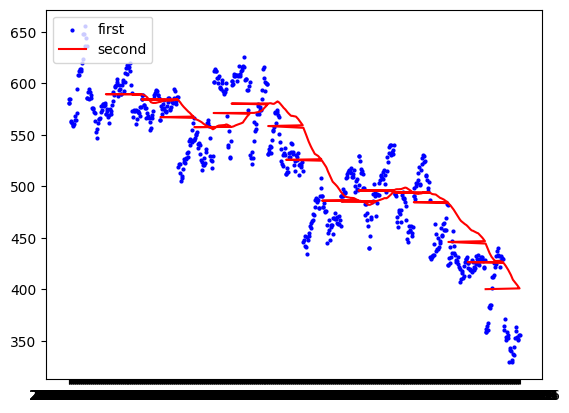

In [28]:
import matplotlib.pyplot as plt

x = range(100)
y = range(100,200)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(df['CH_TIMESTAMP'], df['CH_CLOSING_PRICE'], s=4, c='b', label='first')
ax1.plot(df['CH_TIMESTAMP'], ss, c='r', label='second')
plt.legend(loc='upper left')
plt.show()